# Overfitting

One of the most important issues in Machine Learning is to understand the difference between training and testing errors. The training process will allow the ANN parameters (weights and bias) to be modified to minimise the loss in the **set of patterns used for training**.  If this set of patterns is sufficiently representative, then the ANN will perform well in its working environment, i.e. with new patterns that are not in the training set.  On the other hand, if this set of patterns has not been well chosen, the ANN could not work well with new patterns.  The only way to know this is precisely to evaluate the ANN with new patterns and calculate the error with these **test patterns**.  Since the test set is available from the beginning, this evaluation with the test set is done at the same time as with the training set (but only the training set is used for training). 

Therefore, to assess how well trained an ANN is, this can be done by evaluating the test set, not the training set.  Usually there is only one set of data, so it is usually divided into two subsets: training and test. There are several alternatives to perform this division; in these tutorials, two different ones will be performed: 

* **Hold Out**. In this method, an experiment is performed with a simple partition of the data set, leaving a certain percentage for testing, usually between 20% and 30%. 

* **Cross-validation**.  Here, the data set is divided into $k$ disjoint subsets in order to perform the corresponding $k$ experiments.  In the k-th experiment, the $k$-th set is separated for testing, and trained with the remaining $k-1$.  A usual value of $k$ is 10, so you have a 10-fold crossvalidation.

More specifically, in this session we will focus on the first one, leaving the second one for a later one.  The hold out technique allows us to split the data set into two subsets: training and test.  The training subset allows to adjust the parameters of the model (connection weights and bias), while the test subset allows to check (test) the behavious of a trained ANN (or, any kind of model that is being used, such as a decision tree) on new patterns, not present in the training set.

![Normal training in the left, and an overfitting curve on the right](./img/Overfitting.png)

Given a well-chosen (and therefore sufficiently representative) training set, the training process could be similar to the figure on the left, with both training and test errors decreasing with each cycle. However, in general, it cannot be ensured that the training set is as noise-free and well-chosen as desirable, so that **overtraining** or **overfitting** often occurs during training.  This can be clearly seen in the figure on the right, where both errors are decreasing until a point is reached where the test error starts to increase.   From that point on, the system starts to overfit. 

To avoid overfitting, in ANNs there are a series of techniques known as regularisation techniques, each of which is very different in nature, but all of which aim to avoid overtraining.  Although these techniques are dealt with in much greater depth in other subjects in the programme, e.g. Deep Learning I, in these tutorials we are going to study one of the most well-known techniques, seen in the theory session, called Early Stopping. 

In this technique, instead of dividing the initial set of samples into 2 subsets, we create 3 subsets: training, validation and test.  The training and test sets perform the functions described above. The purpose of the validation set is to avoid overfitting by controlling the training process, but it is not used to modify weights or bias.  There are several ways to control the training process, here we will use two of them together:

* A new criteria for stopping the training process.   With the definition of a new parameter: the maximum number of consecutive cycles without improving the *loss* in the validation set.  If these cycles elapse without improving the best validation *loss* achieved so far, the training is stopped.  As the validation set is not used to modify weights or bias, it gives an estimate of what the test error could be.  Therefore, when the validation error increases, it increases the error in patterns that it has not seen, so it is estimated that the test error would increase, and the network would be overtraining.


* Once the training process has stopped, the validation set determines which network is returned.  During all the training cycles, the loss is calculated in the training set, which is necessary to modify weights and bias, but also in the validation set.   Once the training is stopped, the ANN is returned corresponding not to the last cycle, but to the cycle with the lowest error in the validation set.  This is done because it is estimated that this ANN is the one that will give the lowest error in the test set, i.e. the one that will behave better with new patterns and, consequently, the one that will generalise better. 

Once the training process has stopped and an ANN has been returned, the test set can be evaluated to assess how well the ANN has been trained. 

> **Important**: The errors (or accuracies, or any metric used) in the training and validation sets are interesting, but the one that really matters is the test set. 

However, most of the time you have all 3 sets (training, validation and test) from the beginning, so as you evaluate the training and validation sets, you also evaluate the test set, which is useful for plotting graphs. However, these values in the test set cannot be used for decision making. 

### Question
If what we want to achieve is an ANN with the lowest possible test error, why not choose the ANN corresponding to the cycle with the lowest test error?

`Choosing the ANN corresponding to the cycle with the lowest test error may lead to overfitting and bias the model towards the test set, which is not desirable. The purpose of the test set is to evaluate the performance of the model on new, unseen data, and choosing the ANN based on its performance on the test set defeats this purpose. `

`Instead, the validation set should be used to select the ANN that has the lowest validation error, as this indicates the ANN that generalizes the best to new, unseen data. This approach ensures that the model is not biased towards the test set and that its performance on new data is accurately evaluated.`

Therefore, in the training loop it is necessary to keep a reference to the best validation error found so far.  It is also necessary to keep a copy of the ANN that has given that validation error.  Both elements should be updated every cycle when the validation error improves. It is also necessary to keep a counter of how many consecutive cycles the validation error has not improved.

As can be seen, the test set cannot have any involvement in the training process. This is the right thing to do, since an ANN with completely new patterns is being evaluated. However, from a very strict point of view, there is one part in this whole process where the test set is having a small influence: in the normalisation of the data.

Usually the starting point is a dataset that is first normalised and then split into training/test.  If this is done in this way, the patterns used for testing have some influence on the calculation of the normalisation parameter values, which would not be correct. However, the impact they usually have on these parameters and in general on the performance of the ANN is so low, that this is usually not taken into account and all patterns are normalised together.  In any case, the really correct pipeline to do would be divide the data into train test, to calculate the values of the normalisation parameters only with the training set, and the applied that parameters of normalization to the test prior to run the usual training process. Addtionally, if there is a validation data, it can be used on the normalization, too.

For this assignment, you are asked to perform two sets of experiments, one without using validation and the other using a validation set.  More specifically, the requirements are: 

1. Develop a function called `holdOut` that given two parameters, `N` (equal to the number of patterns) and `P` (value between 0 and 1, indicating the percentage of patterns that will be separated for the test set), returns a tuple with two vectors with the indices of the patterns that will be used for training and testing.  The sum of lengths of both vectors has to be equal to N, and these two vectors have to be disjoint.

  This function can be done in a very simple way using the function `randperm` (to use it, load the module with `using Random`).
  
  From this function, splitting a database into two subsets is done immediately.

In [22]:
using Random

function holdOut(N::Int, P::Float64)
    # Verify that P is a valid probability
    @assert ((P >= 0.0) && (P <= 1.0))

    # Generate random permutation of integers from 1 to N
    indexes = randperm(N)

    # Calculate the size of the test set
    test_size = Int(ceil(N * P))

    # Select the indexes of the test and training sets
    test_indexes = indexes[1:test_size]
    train_indexes = indexes[test_size+1:end]

    # Verify that the length of the training and test sets is correct
    @assert length(train_indexes) + length(test_indexes) == N

    # Return the indexes of the training and test sets
    return (train_indexes, test_indexes)
end

# Split dataset into training and test sets with 80% for test
N = 10
train_indexes, test_indexes = holdOut(N, 0.2)


([2, 5, 9, 7, 1, 10, 4, 6], [3, 8])

2. Develop another function called `holdOut`, the same as the previous one and, based on it, which takes 3 parameters: `N` (number of patterns), `Pval` (rate of patterns in the validation set) and `Ptest` (rate of patterns in the test set), and returns a tuple with 3 vectors, with the indices of the elements of the training, validation and test sets. The sum of the lengths of these 3 vectors has to be equal to `N`.

 To do this, simply make two calls to the previously developed `holdOut` function. 

In [23]:
using Random

function holdOut(N::Int, Pval::Float64, Ptest::Float64)
    # Verify that Pval and Ptest are valid probabilities
    @assert ((Pval >= 0.0) && (Pval <= 1.0)) "Pval must be a probability between 0 and 1"
    @assert ((Ptest >= 0.0) && (Ptest <= 1.0)) "Ptest must be a probability between 0 and 1"
    @assert ((Pval + Ptest) <= 1.0) "Pval + Ptest must be less than or equal to 1"

    # Calculate sizes of train, validation, and test sets
    train_size = Int(round((1 - Pval - Ptest) * N))
    val_size = Int(round(Pval * N))
    test_size = N - train_size - val_size

    # Generate random indices for train, validation, and test sets
    all_indices = randperm(N)
    train_indices = all_indices[1:train_size]
    val_indices = all_indices[train_size+1:train_size+val_size]
    test_indices = all_indices[train_size+val_size+1:end]

    return (train_indices, val_indices, test_indices)
end

# Split dataset into training, validation, and test sets with 60% for training, 20% for validation, and 20% for testing
N = 10
train_indexes, val_indexes, test_indexes = holdOut(N, 0.2, 0.2)


([1, 9, 2, 6, 4, 7], [3, 10], [5, 8])

3. Modify the function for training the ANN developed in the previous session to accept the following *optional* parameters in addition to those defined in the previous practice:
  - **Validation set**, of type `Tuple{AbstractArray{<:Real,2}, AbstractArray{Bool,2}}`, i.e. a tuple of 2 arrays: inputs and targets. Default value to empty arrays.
  - **Test set**, of type `Tuple{AbstractArray{<:Real,2}, AbstractArray{Bool,2}}`, i.e. a tuple of 2 arrays: inputs and targets. Default valuea to empty arrays.
  - **maxEpochsVal**, of type `Int`, which defines the number of cycles without improving the best validation loss found so far that have to elapse to stop training. In other words, it defines a new stop criterion. Default value should be set to 20.
  
  With these parameters, this function should implement the early stopping strategy, for which it is necessary to take care that the ANN returned at the end of the function must be: 
    - If a validation set has been given as a argument (i.e. if it is not empty), the ANN to be returned does not have to be the one being trained, but the one with the best validation error.
    - If no validation set has been passed as a parameter (i.e. if it is empty), the ANN to be returned should be the one corresponding to the last training cycle.  Consequently, the new training function should work in the same way as the previous one in case no validation set is given.
    
  Additionally, from the trained ANN, this function should return a history of the loss values obtained in the training, validation and test sets in each cycle, as a vector each.
  
  - To add elements to the end of a vector, refer to the function `push!`
  - It should be noted that the loss values obtained with the ANN with random weights, prior to training, are usually considered as cycle 0. 
  
  As stated in the previous description, it will be necessary to store the best ANN achieved so far and update it in some iterations of the loop.  To do this, you cannot simply make an assignment to a new variable, since you would only assign the pointer, which would point to the same memory address with the ANN that would be modified in the next iteration.  To make a copy of an object in such a way that all objects (and data, as in this case weights and bias) it contains are also copied, recursively, you can use the function `deepcopy`. 

In [35]:
include("functions.jl")

"""
Calculates the confusion matrix and performance metrics for a multiclass classification problem.

# Arguments
- `outputs::AbstractArray{Bool,2}`: A matrix of predicted outputs, where each row corresponds to a sample and each column corresponds to a class. The values should be binary (true/false) indicating whether the sample belongs to the corresponding class.
- `targets::AbstractArray{Bool,2}`: A matrix of target outputs, where each row corresponds to a sample and each column corresponds to a class. The values should be binary (true/false) indicating whether the sample belongs to the corresponding class.
- `weighted::Bool=true`: A boolean indicating whether to calculate the weighted or unweighted performance metrics. If `weighted=true`, the metrics are weighted by the number of samples in each class.

# Returns
A named tuple containing the following performance metrics:
- `accuracy`: The overall accuracy of the classification.
- `errorRate`: The overall error rate of the classification.
- `sensitivity`: A vector of sensitivities (true positive rate) for each class.
- `specificity`: A vector of specificities (true negative rate) for each class.
- `precision`: A vector of precisions (positive predictive value) for each class.
- `negative_predictive_value`: A vector of negative predictive values for each class.
- `fScore`: A vector of F1 scores for each class.
- `confusion_matrix`: The confusion matrix, where each row corresponds to a predicted class and each column corresponds to a true class.
"""

function trainClassAnn(topology::AbstractArray{<:Int,1},  
            trainingDataset::Tuple{AbstractArray{<:Real,2}, AbstractArray{Bool,2}}; 
            validationDataset::Tuple{AbstractArray{<:Real,2}, AbstractArray{Bool,2}}= 
                    (Array{eltype(trainingDataset[1]),2}(undef,0,0), falses(0,0)), 
            testDataset::Tuple{AbstractArray{<:Real,2}, AbstractArray{Bool,2}}= 
                    (Array{eltype(trainingDataset[1]),2}(undef,0,0), falses(0,0)), 
            transferFunctions::AbstractArray{<:Function,1}=fill(σ, length(topology)), 
            maxEpochs::Int=1000, minLoss::Real=0.0, learningRate::Real=0.01,  
            maxEpochsVal::Int=20, showText::Bool=false)
    
    # Split into inputs/targets
    trainingInputs, trainingTargets = trainingDataset
    validationInputs, validationTargets = validationDataset
    testInputs, testTargets = testDataset
    
    useValidation = length(validationInputs) > 0
   
    # Check that the targets corresponding to the inputs have the same number of samples
    @assert (size(trainingInputs, 1) == size(trainingTargets, 1)) "Number of training inputs and targets do not match"
    @assert (size(validationInputs, 1) == size(validationTargets, 1)) "Number of validation inputs and targets do not match"
    @assert (size(testInputs, 1) == size(testTargets, 1)) "Number of test inputs and targets do not match"
    
    # Check that all the subsets have the same number of attributes/classes
    @assert (size(trainingTargets, 2) == size(validationTargets, 2) == size(testTargets, 2)) "Number of classes for training, validation and test do not match"
    if (useValidation)
        @assert (size(trainingInputs, 2) == size(validationInputs, 2)) "Number of attributes for training and validation do not match"
    end
    if (size(testInputs, 1) != 0)
        @assert (size(trainingInputs, 2) == size(testInputs, 2)) "Number of attributes for training and test do not match"
    end
   
    # Build the network
    nInputs, nOutputs = size(trainingInputs, 2), size(trainingTargets, 2)
    ann = buildClassANN(nInputs, topology, nOutputs; transferFunctions)
    println("ANN network built: $ann")
    
    # Loss
    loss(x,y) = (size(y, 1) == 1) ? Losses.binarycrossentropy(ann(x), y) : Losses.crossentropy(ann(x), y)
    
    # Metric progress
    trainingLosses = Array{Float32}(undef, 0)
    validationLosses = Array{Float32}(undef, 0)
    testLosses = Array{Float32}(undef, 0)
    trainingAccs = Array{Float32}(undef, 0)
    validationAccs = Array{Float32}(undef, 0)
    testAccs = Array{Float32}(undef, 0)

    # Train for n=max_epochs (at most) epochs
    currentEpoch = 0

    # Calculate, store and print last loss/accuracy
    function calculateMetrics()
        
        # Losses
        trainingLoss   = loss(trainingInputs', trainingTargets')
        validationLoss = (size(validationInputs, 1) != 0) ? loss(validationInputs', validationTargets') : 0
        testLoss       = (size(testInputs, 1) != 0) ? loss(testInputs', testTargets') : 0
     
        # Accuracies
        trainingOutputs   = ann(trainingInputs')
        validationOutputs = ann(validationInputs')
        testOutputs       = ann(testInputs')
        trainingAcc   = accuracy(trainingOutputs',   trainingTargets)
        validationAcc = accuracy(validationOutputs', validationTargets)
        testAcc       = accuracy(testOutputs',       testTargets)

        # Update the history of losses and accuracies
        push!(trainingLosses, trainingLoss)
        push!(validationLosses, validationLoss)
        push!(testLosses, testLoss)
        push!(trainingAccs, trainingAcc)
        push!(validationAccs, validationAcc)
        push!(testAccs, testAcc)
            
        # Show text
        if showText && (currentEpoch % 50 == 0)
            println("Epoch ", currentEpoch, 
                ": \n\tTraining loss: ", trainingLoss, ", accuracy: ", 100 * trainingAcc, 
                "% \n\tValidation loss: ", validationLoss, ", accuracy: ", 100 * validationAcc, 
                "% \n\tTest loss: ", testLoss, ", accuracy: ", 100 * testAcc, "%")
        end
        
        return trainingLoss, trainingAcc, validationLoss, validationAcc, testLoss, testAcc
    end

    # Compute and store initial metrics
    trainingLoss, _, validationLoss, _, _, _ = calculateMetrics()

    # Best model at validation set 
    numEpochsValidation = 0
    bestValidationLoss = validationLoss
    
    if (useValidation)
        bestAnn = deepcopy(ann)
    else
        bestAnn = ann  # if no validation, we want to return the ANN that is trained in every cycle
    end
    
    # Start the training
    while (currentEpoch < maxEpochs) && (trainingLoss > minLoss) && (numEpochsValidation < maxEpochsVal)
            
        # Update epoch number
        currentEpoch += 1
        
        # Fit the model
        Flux.train!(loss, Flux.params(ann), [(trainingInputs', trainingTargets')], ADAM(learningRate))
     
        # Compute and store metrics
        trainingLoss, _, validationLoss, _, _, _ = calculateMetrics()

        # Update validation early stopping only if validation set given
        if (useValidation)    
            if (validationLoss < bestValidationLoss)
                bestValidationLoss = validationLoss
                numEpochsValidation = 0
                bestAnn = deepcopy(ann)
            else
                numEpochsValidation += 1
            end
        end
    end
    
    # Print stop reason and final metrics
    println("Final results for epoch $currentEpoch: 
        \n\tTraining loss: $(trainingLosses[end]), accuracy: $(100 * trainingAccs[end])%
        \n\tValidation loss: $(validationLosses[end]), accuracy: $(100 * validationAccs[end])%
        \n\tTest loss: $(testLosses[end]), accuracy: $(100 * testAccs[end])%")

    println("\nStopping criteria: 
        \n\tMax. epochs: $(currentEpoch >= maxEpochs)
        \n\tMin. loss: $(trainingLoss <= minLoss)
        \n\tNum. epochs validation: $(numEpochsValidation >= maxEpochsVal)")
    
    return bestAnn, trainingLosses, validationLosses, testLosses, trainingAccs, validationAccs, testAccs
end

trainClassAnn (generic function with 2 methods)

4. Since there were two versions of the ANN training function (the second accepted a vector as desired outputs), modify this function in the same way so that the targets are vectors instead of arrays for the two-class classification case. Note that in this case the types of the training, validation and test sets passed as parameters will be `Tuple{AbstractArray{<:Real,2}, AbstractArray{Bool,1}}` for all three and therefore it will be necessary to call the function `reshape` on all three. 

In [36]:
function trainClassAnn(topology::AbstractArray{<:Int,1},  
        trainingDataset::Tuple{AbstractArray{<:Real,2}, AbstractArray{Bool,1}}; 
        validationDataset::Tuple{AbstractArray{<:Real,2}, AbstractArray{Bool,1}}= 
                    (Array{eltype(trainingDataset[1]),2}(undef,0,0), falses(0)), 
        testDataset::Tuple{AbstractArray{<:Real,2}, AbstractArray{Bool,1}}= 
                    (Array{eltype(trainingDataset[1]),2}(undef,0,0), falses(0)), 
        transferFunctions::AbstractArray{<:Function,1}=fill(σ, length(topology)),
        maxEpochs::Int=1000, minLoss::Real=0.0, learningRate::Real=0.01,  
        maxEpochsVal::Int=20, showText::Bool=false)

    # Split the datasets into inputs and targets
    trainingInputs, trainingTargets = trainingDataset
    testInputs, testTargets = testDataset
    validationInputs, validationTargets = validationDataset

    # Reshape the targets to match the expected dimensions
    testTargets = reshape(testTargets, :, 1)
    validationTargets = reshape(validationTargets, :, 1)
    trainingTargets = reshape(trainingTargets, :, 1)

    # Check if the validation and test datasets are empty
    isValEmpty = size(validationDataset[1]) == (0, 0)
    isTestEmpty = size(testDataset[1]) == (0, 0)

    # Call the trainClassANN function recursively with the correct arguments
    return trainClassANN(topology, (trainingInputs, trainingTargets);
        validationDataset = (validationInputs, validationTargets),
        testDataset = (testInputs, testTargets),
        transferFunctions = transferFunctions, maxEpochs = maxEpochs,
        minLoss = minLoss, learningRate = learningRate,
        maxEpochsVal = maxEpochsVal, showText= showText
    )
end

trainClassAnn (generic function with 2 methods)

Remember to integrate the code developed in previous sessions to validate the following pipeline:

1. Load the database, having the patterns in rows and desired attributes and outputs in columns. 

2. Use the function `holdOut` to split the data set into training, validation and test with the desired percentages. These percentages can be equal to 0.  You will therefore have 6 matrices: inputs and targets in training, validation and test (some may be empty if the corresponding percentage is 0). 

3. Calculate the parameter values corresponding to the type of normalisation to be used with your data (maximum/minimum or mean/standard deviation for each attribute) from the training set only.
  * This part does not ask to normalise the training set, but to calculate the normalisation values from the training set. 
4. With these parameters for normalisation calculated in the previous step, normalise training, validation and test sets.
5. Train different architectures, and, for each one of them, draw graphs of the evolution of the training, validation and test loss values in the same graph, including cycle 0. 

ANN network built: Chain(Dense(4 => 8, σ), Dense(8 => 3), softmax)
Final results for epoch 100: 
        
	Training loss: 0.4140647, accuracy: 90.0%
        
	Validation loss: 0.40802896, accuracy: 86.666664%
        
	Test loss: 0.4098655, accuracy: 93.333336%

Stopping criteria: 
        
	Max. epochs: true
        
	Min. loss: false
        
	Num. epochs validation: false


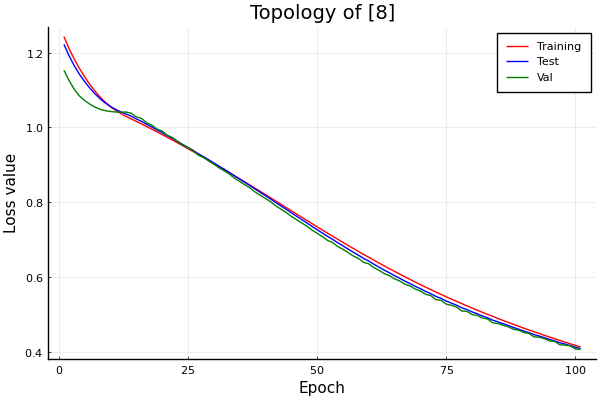

ANN network built: Chain(Dense(4 => 4, σ), Dense(4 => 3, σ), Dense(3 => 3), softmax)
Final results for epoch 100: 
        
	Training loss: 0.73717594, accuracy: 68.88889%
        
	Validation loss: 0.72282165, accuracy: 60.000004%
        
	Test loss: 0.71833813, accuracy: 66.66667%

Stopping criteria: 
        
	Max. epochs: true
        
	Min. loss: false
        
	Num. epochs validation: false


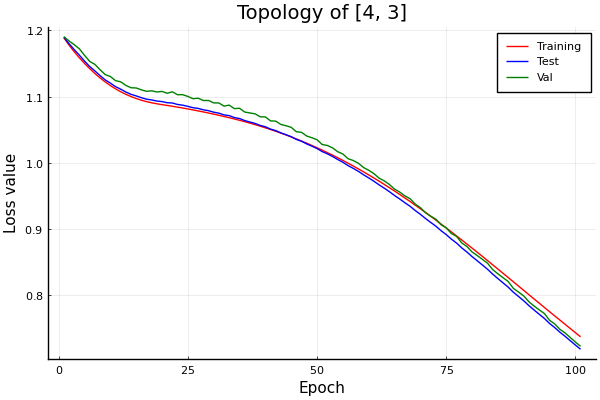

ANN network built: Chain(Dense(4 => 6, σ), Dense(6 => 4, σ), Dense(4 => 3), softmax)
Final results for epoch 100: 
        
	Training loss: 0.60867304, accuracy: 81.11111%
        
	Validation loss: 0.58664167, accuracy: 66.66667%
        
	Test loss: 0.5969141, accuracy: 73.333336%

Stopping criteria: 
        
	Max. epochs: true
        
	Min. loss: false
        
	Num. epochs validation: false


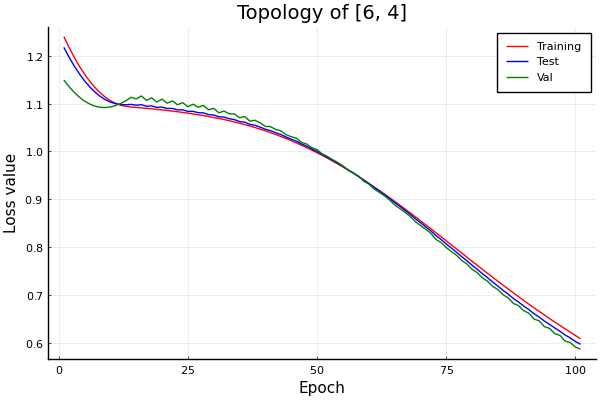

ANN network built: Chain(Dense(4 => 16, σ), Dense(16 => 16, σ), Dense(16 => 3), softmax)
Final results for epoch 100: 
        
	Training loss: 0.22067167, accuracy: 95.55556%
        
	Validation loss: 0.21795939, accuracy: 96.666664%
        
	Test loss: 0.24012427, accuracy: 90.0%

Stopping criteria: 
        
	Max. epochs: true
        
	Min. loss: false
        
	Num. epochs validation: false


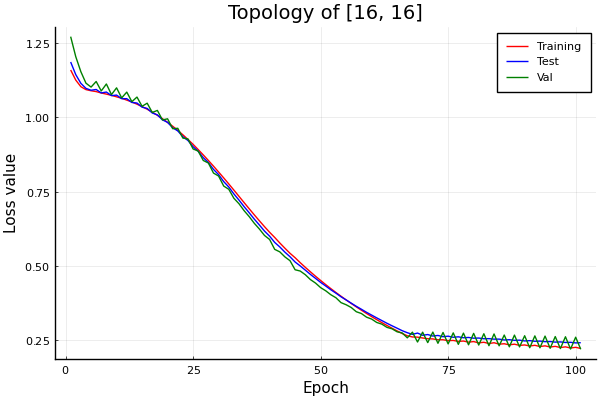

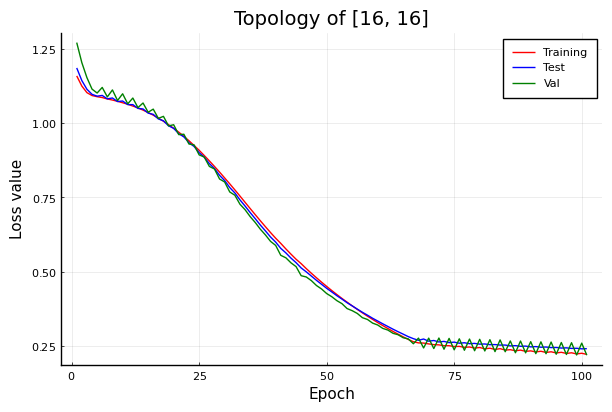

In [37]:
using DelimitedFiles
using Plots
include("functions.jl")

# Define the parameters
topologies = [[8], [4, 3], [6, 4], [16, 16]]
learningRate = 0.01
numMaxEpochs = 100

# Load the dataset
dataset = readdlm("iris.data", ',')

# Prepare the data
inputs = convert(Array{Float32,2}, dataset[:,1:4])
normalizeMinMax!(inputs)
targets = oneHotEncoding(dataset[:,5])

# Split the data into training, validation, and test sets
(trainIndex, validationIndex, testIndex) = holdOut(size(inputs, 1), 0.2, 0.2)
trainingInputs = inputs[trainIndex, :]
testInputs = inputs[testIndex, :]
trainingTargets = targets[trainIndex, :]
testTargets = targets[testIndex, :]
validationInputs = inputs[validationIndex, :]
validationTargets = targets[validationIndex, :]

results = Float32[]

for topology in topologies
    _, trainingLosses, validationLosses, testLosses = trainClassAnn(
        topology, (trainingInputs, trainingTargets);
        validationDataset = (validationInputs, validationTargets),
        testDataset = (testInputs, testTargets),
        maxEpochs = numMaxEpochs, learningRate = learningRate, showText=false
    )

    plotTrain = plot(trainingLosses, xaxis = "Epoch", yaxis = "Loss value",
                     title = "Topology of $topology", color = :red, label = "Training")
    plot!(plotTrain, testLosses, color = :blue, label = "Test")
    plot!(plotTrain, validationLosses, color = :green, label = "Val")

    push!(results, testLosses[end])
    display(plotTrain)
end

### Question
Has the test error always decreased or has there come a point where it has started to increase?

`It seems that the test loss has always decreased as the model was trained. But it is worth mentioning that in the first epochs of training the test error presents some peaks. This may be due to randomness in the training process of a neural network, since during the first epochs the ANN weights are randomly initialized and gradually asjusted as the ANN is trained. Overall, the presence of these peaks in the test error during the first epochs of training does not necessarily indicate that the model is overfitting the training data.`


### Question
How do the 3 precision values evolve?

`For the first network, the accuracy on the training set is 90.0%, on the validation set is 86.666664%, and on the test set is 93.333336%. This suggests that the network is performing well on the test set, but may be overfitting to the training set.`

`For the second network, the accuracy on the training set is 68.88889%, on the validation set is 60.000004%, and on the test set is 66.66667%. This suggests that the network is not performing well on any of the sets, and may be underfitting.`

`For the third network, the accuracy on the training set is 81.11111%, on the validation set is 66.66667%, and on the test set is 73.333336%. This suggests that the network is performing moderately well on the test set, but may be overfitting to the training set.`

`For the fourth network, the accuracy on the training set is 95.55556%, on the validation set is 96.666664%, and on the test set is 90.0%. This suggests that the network is performing well on the validation set, but may be overfitting to the training set.`

`Overall, we can see that the accuracy values vary depending on the network and the dataset used. It is important to evaluate the performance of the network on multiple datasets to ensure that it is not overfitting or underfitting.`

### Question
Which criteria usually stop the training? Why?

`In general, the training is stopped by max epochs criteria. This could be due to a variety of reasons, such as the model taking longer to converge than expected, or the learning rate being too low. It is also possible that the other stopping criteria were not set appropriately, or that the model was not able to meet those criteria within the maximum number of epochs.`

### Question
To which cycle does the ANN returned by the function correspond? 

`The ANN returned by the "trainClassANN" function corresponds to the final cycle of the training process, except for those cases when it performs early-stopping. The function trains the ANN for a fixed number of epochs, which is specified by the "maxEpochs" parameter. After each epoch, the function updates the weights of the ANN based on the gradients of the loss function with respect to the weights. The function repeats this process for the specified number of epochs, or until a stopping criterion is met.`

`At the end of the training process, the function returns the ANN with the final weights. These weights correspond to the final cycle of the training process, which is the cycle that produced the weights that minimize the loss function on the training set. The ANN returned by the function is therefore optimized to perform well on the training set, but may not generalize well to new data.`

# Julia Notes

Julia has a library that allows you to display all kinds of plots in a very simple way.  To load it, simply put `using Plots`, the documentation can be found at http://docs.juliaplots.org/. As always the first should be to install, ifg it is not already installed:

In [6]:
using Pkg; Pkg.add("Plots")

    Updating registry at `/opt/julia/registries/General.toml`
   Resolving package versions...
   Installed EpollShim_jll ─ v0.0.20230411+0
  No Changes to `/opt/julia/environments/v1.9/Project.toml`
    Updating `/opt/julia/environments/v1.9/Manifest.toml`
  [2702e6a9] + EpollShim_jll v0.0.20230411+0
Precompiling project...
  ✓ EpollShim_jll



Actually, `Plots.jl` is not a package for displaying plots, but an interface to a set of libraries for displaying plots.  Plots.jl provides a set of functions that allow, in a unified way, to display plots using one or another library, with the same calls.  That is, what Plots.jl does is to interpret the commands and generate the plots using another graphics library, which it refers to as a backend. Therefore, it is possible to change the graphics library (backend) without having to modify the code, since the calls to the corresponding functions are the same for all backends. 

So, first of all, after loading `Plots`, is to select the backend you want to work with.  Julia provides a large number of widely used ones, which you have to install in the usual way if you want to use them. If you don't indicate which one you want to use, Julia defaults to choosing one depending on which ones are installed. To see which backend is being used, you can simply type `backend()`.

In [7]:
using Plots
backend()

Plots.GRBackend()

┌ Error: Pkg.precompile error
│   exception =
│    SystemError: mktemp: Permission denied
│    Stacktrace:
│      [1] systemerror(p::Symbol, errno::Int32; extrainfo::Nothing)
│        @ Base ./error.jl:176
│      [2] #systemerror#82
│        @ ./error.jl:175 [inlined]
│      [3] systemerror
│        @ ./error.jl:175 [inlined]
│      [4] mktemp(parent::String; cleanup::Bool)
│        @ Base.Filesystem ./file.jl:619
│      [5] mktemp
│        @ ./file.jl:616 [inlined]
│      [6] compilecache(pkg::Base.PkgId, path::String, internal_stderr::IO, internal_stdout::IO, keep_loaded_modules::Bool)
│        @ Base ./loading.jl:2186
│      [7] #249
│        @ /opt/julia-1.9.3/share/julia/stdlib/v1.9/Pkg/src/API.jl:1438 [inlined]
│      [8] withenv(f::Pkg.API.var"#249#280"{IOBuffer, String, Base.PkgId}, keyvals::Pair{String, String})
│        @ Base ./env.jl:197
│      [9] (::Pkg.API.var"#248#279"{IOBuffer, String, Base.PkgId})()
│        @ Pkg.API /opt/julia-1.9.3/share/julia/stdlib/v1.9/Pkg/src/A

Some of the most common backends are: Plotly, PyPlot, PlotlyJS and GR. In general, to use a backend, you simply make a call to a function named after the backend itself, but in lowercase. For the 4 given as examples at the beginning of this paragraph, it would be with calls to `plotly()`, `pyplot()`, `plotlyjs()` and `gr()` respectively. As said before, in case it is not installed you will have to install it in the usual way, writing `Pkg.add("Plotly")`, `Pkg.add("PyPlot")`, `Pkg.add("PlotlyJS")` or `Pkg.add("GR")` respectively.   More information about the different backends can be found at https://docs.juliaplots.org/latest/backends/.

In [8]:
# Install the pyplot and plotly if you do not have it
using Pkg;
Pkg.add("PyPlot")
Pkg.add("PlotlyJS")
plotlyjs()
pyplot()

   Resolving package versions...
   Installed PyPlot ─ v2.11.2
    Updating `/opt/julia/environments/v1.9/Project.toml`
  [d330b81b] + PyPlot v2.11.2
    Updating `/opt/julia/environments/v1.9/Manifest.toml`
  [d330b81b] + PyPlot v2.11.2
Precompiling project...
  ✓ PyPlot
  1 dependency successfully precompiled in 2 seconds. 382 already precompiled.
   Resolving package versions...
   Installed PlotlyBase ──────────── v0.8.19
   Installed Hiccup ──────────────── v0.2.2
   Installed Lazy ────────────────── v0.15.1
   Installed Pidfile ─────────────── v1.3.0
   Installed Blink ───────────────── v0.12.8
   Installed AssetRegistry ───────── v0.1.0
   Installed Kaleido_jll ─────────── v0.2.1+0
   Installed WebSockets ──────────── v1.6.0
   Installed JSExpr ──────────────── v0.5.4
   Installed Mustache ────────────── v1.0.17
   Installed PlotlyJS ────────────── v0.18.11
   Installed FunctionalCollections ─ v0.5.0
   Installed Mux ─────────────────── v1.0.1
   Installed WebIO ────────────────

WebIO._IJuliaInit()

Plots.PyPlotBackend()

Once the desired backend is loaded, or with the default backend, you can start plotting. The easiest way is to use the plot function, which receives two parameters: the series to be put on the x-axis, and the series to be put on the y-axis, both as vectors, for example: 

In [9]:
plot(1:5, [2, 3, 1, 3, 5])

LoadError: InterruptException:

In general, if you want to put more than one series on the graph, it is sufficient to specify one column per series in the matrix you pass to it for the y-axis data, for example:

In [10]:
plot(1:5, [2 1; 3 -1; 1 0; 3 2; 5 4])

LoadError: InterruptException:

Another way to do this is to add more series to the plot object that has been created. That is, the call to plot returns an object that can be modified by further calls to `plot!` and passing it as the first parameter (remember that when the name of a function ends in `!` the argument passed is modified). The above example could be done in the following way: 

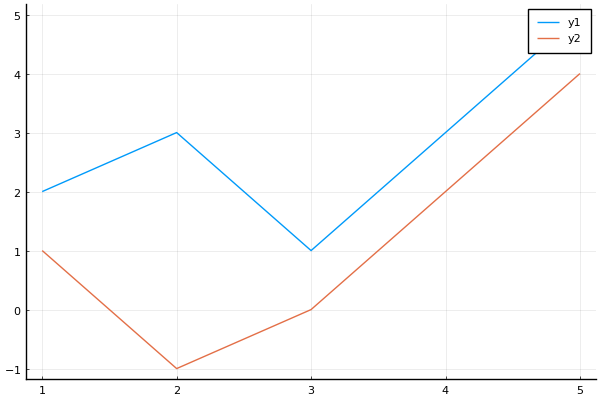

In [11]:
g = plot(1:5, [2, 3, 1, 3, 5]) 
plot!(g, 1:5, [1, -1, 0, 2, 4])

Or alternatively:

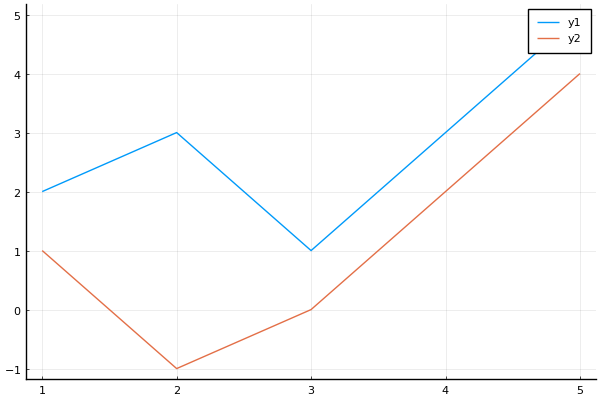

In [12]:
g = plot() 
plot!(g, 1:5, [2, 3, 1, 3, 5]) 
plot!(g, 1:5, [1, -1, 0, 2, 4])

For any of these three possibilities, if this is done in the command interpreter, the graph will appear.  In fact, in the second and third possibilities, more than one graph will appear as you create them. However, if this is done in a script, the graph does not automatically appear.  If we want it to appear, we have to make a call to display in this way: 

```julia
    display(g)
```

Besides the function plot, there are many other functions that allow you to represent other types of graphs and charts with the usual names, such as `heatmap`, `plot3d`, `scatter`, `histogram`, `boxplot`, `violin`, etc., all of them with their corresponding function ending in `!`.  As always, you can consult the help of a function by typing, for example: 

In [13]:
?boxplot

search: boxplot boxplot!



```
boxplot(x, y)
boxplot!(x, y)
```

Make a box and whisker plot.

# Keyword arguments

  * `notch`: Bool. Notch the box plot? (false)
  * `whisker_range`: Real. Whiskers extend `whisker_range`*IQR below the first quartile          and above the third quartile. Values outside this range are shown as outliers (1.5)
  * `outliers`: Bool. Show outliers? (true)
  * `whisker_width`: Real or Symbol. Length of whiskers; the options are `:match` to match the box width, `:half`, or a number to indicate the total length. (:half)

# Example

```julia-repl
julia> using StatsPlots
julia> boxplot(repeat([1,2,3],outer=100),randn(300))
```


Generally speaking, it is desired to add more information to the graphs than just the data used in the graph.  This information usually includes title, labels on the axes, legend, markers at each point, line type, colours, etc.  This is usually done through attributes passed as keywords in function calls, such as `axis`, `label`, `line`, `fill`, `marker`, `ticks`, `title`, `xlabel`, `ylabel`, for example: 

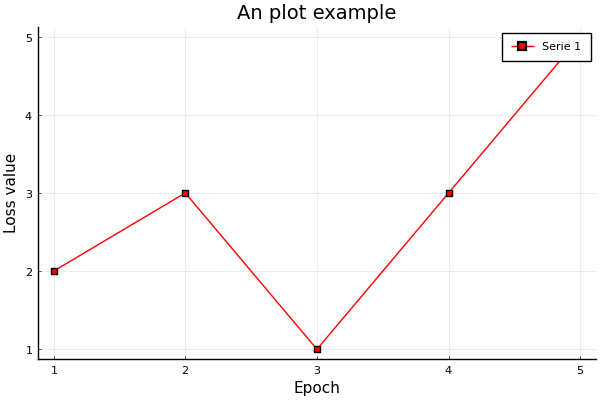

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [14]:
plot(1:5, [2, 3, 1, 3, 5], 
    xaxis = "Epoch", yaxis = "Loss value", title = "An plot example", 
    marker = :square, color = :red, label = "Serie 1")

A quick overview of the most common keywords can be found at https://docs.juliaplots.org/latest/attributes/.   On the other hand, https://docs.juliaplots.org/latest/generated/supported/tenéis has a complete list of the different types of series, keywords, markers, line styles and scales supported by each backend.  As you can see, the list of graphs and arguments is quite extensive, which gives you an idea of the enormous possibilities Julia offers when it comes to plotting graphs.

Another common issue when displaying graphs is to combine several graphs within a single window.  There are several methods to do this, the simplest and most commonly used being by using the keyword `layout` in the call to the corresponding function to generate the graph containing all of them.  In this sense, it is the easiest way to generate the graphs independently, and combine them later in a new call using the keyword `layout`, which receives as parameter a tuple with the number of rows and columns of the matrix of graphs, for example:

In [ ]:
p1 = plot(1:4, [1, 3, 4, 2]); 
p2 = plot(1:4, [2, 3, 2, 1]); 
p3 = plot(1:4, [3, 2, 1, 2]); 
plot(p1, p2, p3, layout = (3,1))

As you could see, the plots asre arrange in a column layout each one in a row, alternatively, if we invert the order the result could be set in a single row as in:

In [ ]:
plot(p1, p2, p3, layout = (1,3))

More information on how to combine graphics can be found at https://docs.juliaplots.org/latest/layouts/. 

Finally, another very common action is to save the generated graphs.  This can be done by means of the savefig function, which receives as parameters the graph to save and the file name. From the extension indicated in the file name, Julia saves the graph in the indicated format. Some of the most typical formats are `pdf`, `png` or `ps`.  Although this is a very easy way to save the graphs, not all file types are supported by all backends. At https://docs.juliaplots.org/latest/output/ you can check the file formats supported by each backend. For exple with the previous example.

```julia
    g = plot(p1, p2, p3, layout = (1,3))
    savefig(g, 'ExampleSingleRow.png')
```